In [2]:
#import libraries

#wrangling
import numpy as np
import pandas as pd
import pycountry
import pycountry_convert as pc

#visualization
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline
from wordcloud import WordCloud,  ImageColorGenerator, STOPWORDS

#statistics
import statsmodels

#formatting
from IPython.display import Image

In [3]:
Image(url="banner.jpg")

### I'm considering a career in data. To give myself a better idea of what that future would look like, I used my data analysis skills to get the details on the data industry. 😉

### The three most important things to me when considering a career are:

In [4]:
Image(url="factors.jpg")

#### I used the [Data Science Job Salaries](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries) data set on Kaggle to answer the following questions:

1. [What is the average salary for data jobs in each country? How has it changed the past 3 years?](#salary_country)
2. [What are the current remote working practices in different regions? Are we moving towards fully remote work?](#remote_work_percentage)
3. [What are the common words in job titles in data?](#job_titles)
4. [What is the average salary for different data jobs?](#salary_job_type)
5. [How much does salary increase with experience level?](#salary_experience)

### Some data exploration and cleaning 🧹

In [61]:
#Load data
data = pd.read_csv('ds_salaries.csv', index_col = 0);

In [63]:
#Check if column types were recognized correctly
data.dtypes;

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [67]:
# Remote ratio is actually categorical instead of numeric. Change data type of remote ratio column
data['remote_ratio'] = data['remote_ratio'].astype(object);

In [68]:
#Check for missing data. There isn't any.
data.isnull().sum();

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [69]:
#Check descriptive statistics for numeric columns
#The central tendency and spread aren't relevant for the year column, but what we can see is that we have data for 3 years from 2020 to 2021.
data.describe();

,work_year,salary,salary_in_usd
count,607.000000,6.070000e+02,607.000000
mean,2021.405272,3.240001e+05,112297.869852
std,0.692133,1.544357e+06,70957.259411
min,2020.000000,4.000000e+03,2859.000000
25%,2021.000000,7.000000e+04,62726.000000
50%,2022.000000,1.150000e+05,101570.000000
75%,2022.000000,1.650000e+05,150000.000000
max,2022.000000,3.040000e+07,600000.000000


In [12]:
#Check descriptive statistics for object columns
data.describe(include = object);

,experience_level,employment_type,job_title,salary_currency,employee_residence,remote_ratio,company_location,company_size
count,607,607,607,607,607,607,607,607
unique,4,4,50,17,57,3,50,3
top,SE,FT,Data Scientist,USD,US,100,US,M
freq,280,588,143,398,332,381,355,326


In [70]:
#Check unique values for the categorical columns of interest for any mispellings
#Experience Level
data['experience_level'].unique();

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [71]:
#Employment Type
data['employment_type'].unique();

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [72]:
#Job Title
data['job_title'].value_counts();

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

In [122]:
# Remote_ratio
data['remote_ratio'].value_counts();

100    381
0      127
50      99
Name: remote_ratio, dtype: int64

In [123]:
#Change the levels for columns of interest so they are more reader-friendly
data['experience_level'] = data['experience_level'].replace('EN','Entry-level/Junior')
data['experience_level'] = data['experience_level'].replace('MI','Mid-level/Intermediate')
data['experience_level'] = data['experience_level'].replace('SE','Senior-level/Expert')
data['experience_level'] = data['experience_level'].replace('EX','Executive-level/Director')

data['remote_ratio'] = data['remote_ratio'].replace(0,'No remote or less than 20%')
data['remote_ratio'] = data['remote_ratio'].replace(50,'Partially remote')
data['remote_ratio'] = data['remote_ratio'].replace(100,'Fully remote');

### Average Salary Per Country Across Years

Insights
1. We don't have data for majority of regions outside North America and Europe in 2020 and 2022. 
2. It appears that Rusia has the highest mean salary per year, but it's because the data set only has 2 entries from RUS and one of them is head of data at a large company earning 230k a year. 
3. In general jobs in North America pay higher than those in Europe, but the trade off is the higher cost of living and of healthcare.
4. The salaries in Europe remain relatively stable within the 50k to sub 100k range.

<a name="salary_country"></a>

In [77]:
# Calculate the mean salary in USD per country per year
salary_country = data.groupby(['work_year', 'company_location'], as_index = False)['salary_in_usd'].mean()

In [80]:
# Check if we summarized the data correctly
salary_country.head()

,work_year,company_location,salary_in_usd
0,2020,ARE,115000.0
1,2020,AUT,82683.5
2,2020,CAN,117104.0
3,2020,CHN,43331.0
4,2020,DEU,67157.0


In [79]:
# Convert the 2-letter country codes into 3-letter codes so that plotly express can recognize the countries
salary_country['company_location'] = salary_country['company_location'].apply(lambda x:pycountry.countries.get(alpha_2 = x).alpha_3)

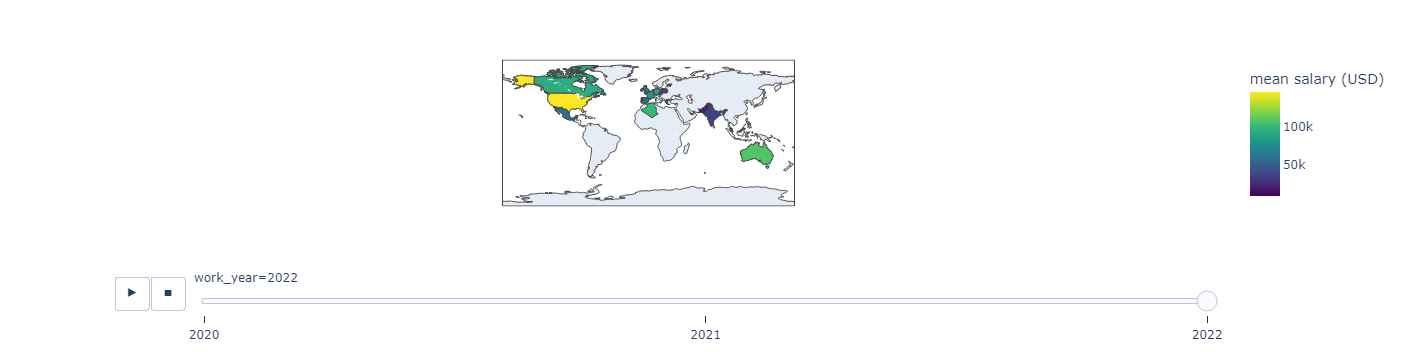

In [81]:
# Create a choropleth map to map salaries onto a world map
fig = px.choropleth(salary_country, 
    locations= 'company_location', 
    color= 'salary_in_usd',
    color_continuous_scale="Viridis",
    scope="world",
    animation_frame = 'work_year',
    labels={'name' : 'country',
            'salary_in_usd':'mean salary (USD)'}
)
fig.show()

In [82]:
# total of 2 entries in Russia where one position is the head of data at a large company earning 230k
data[data.company_location == 'RU']

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
160,2021,EX,FT,Head of Data,230000,USD,230000,RU,50,RU,L
161,2021,EX,FT,Head of Data Science,85000,USD,85000,RU,0,RU,M


### Remote Working Practices by Region

<a name="remote_work_percentage"></a>

Insights
1. In 2020, more than half of data jobs in Asia were not done remotely, while 75% of jobs in north America were done remotely. Europe had majority partially remote.
2. The following year there was a large shift in Asia where practices started to move towards remote working.
3. In 2022, the trends in Asia have fully shifted towards majority remote working. In Europe and North America, partial remote working has become less popular with a shift towards completely remote working or a full in-person mode. 
4. Some factors might that led to overall increase in full remote work post-pandemic could be the flexibility it allows workers and reduced operating costs of businesses. 

In [124]:
# create a copy of the original data
remote_df = data

In [125]:
# there aren't enough observations per country, so we'll work in larger regions by continent
remote_df['continent'] = remote_df['company_location'].apply(lambda x: pc.country_alpha2_to_continent_code(x))

In [126]:
# Check how many observations there are per continent per year
remote_df = remote_df.groupby(['work_year', 'continent'], as_index = False)['remote_ratio'].value_counts()

In [127]:
# There are only a few observations for South America, Africa, and Oceania across years. 
remote_df.head(5)

,work_year,continent,remote_ratio,count
0,2020,AF,Fully remote,1
1,2020,AS,No remote or less than 20%,5
2,2020,AS,Partially remote,2
3,2020,AS,Fully remote,2
4,2020,EU,Partially remote,14
5,2020,EU,Fully remote,8
6,2020,EU,No remote or less than 20%,6
7,2020,NA,Fully remote,25
8,2020,NA,No remote or less than 20%,4
9,2020,NA,Partially remote,4


In [128]:
#We'll retain these 3 areas that have consistent observations across the 3 years in the data set which are North America, Europe, and Asia.
remote_df = remote_df.loc[(remote_df['continent'] == 'NA') | (remote_df['continent'] == 'EU') | (remote_df['continent'] == 'AS')]

In [129]:
#Raw counts are not very useful in describing the state of remote work. Percentages are much more informative, but requires some wrangling.
#Convert remote ratio to wide format to compute % remote working pattern
remote_df_pivot = remote_df.pivot_table(index = ['work_year', 'continent'], columns = 'remote_ratio', values = 'count').reset_index()

In [130]:
remote_df_pivot

remote_ratio,work_year,continent,Fully remote,No remote or less than 20%,Partially remote
0,2020,AS,2,5,2
1,2020,EU,8,6,14
2,2020,NA,25,4,4
3,2021,AS,10,8,12
4,2021,EU,26,6,36
5,2021,NA,76,18,17
6,2022,AS,6,1,1
7,2022,EU,35,23,3
8,2022,NA,185,54,6


In [131]:
#Get the total number of observations per region and year to calculate the percentage
remote_df_pivot['total_jobs'] = remote_df_pivot['No remote or less than 20%'] + remote_df_pivot['Fully remote'] + remote_df_pivot['Partially remote']

In [132]:
#Calculate the percentage of each remote working pattern
remote_df_pivot['% not remote'] = round(remote_df_pivot['No remote or less than 20%'] / remote_df_pivot['total_jobs'] * 100, 2)                                                                                                                      
remote_df_pivot['% partially remote'] = round(remote_df_pivot['Partially remote'] / remote_df_pivot['total_jobs'] * 100, 2)
remote_df_pivot['% fully remote'] = round(remote_df_pivot['Fully remote'] / remote_df_pivot['total_jobs'] * 100, 2)

In [133]:
#Remove the columns that display counts, because we're only interested in plotting the percentages
remote_df_pivot = remote_df_pivot.drop(['Fully remote', 'No remote or less than 20%', 'Partially remote', 'total_jobs'], axis = 1)

In [134]:
#Convert the data frame back into long format
remote_df_pivot = remote_df_pivot.melt(id_vars=['work_year', 'continent'], 
        var_name='remote_ratio', 
        value_name="% of companies")

In [137]:
remote_df_pivot.head(3)

,work_year,continent,remote_ratio,% of companies
0,2020,AS,% not remote,55.56
1,2020,EU,% not remote,21.43
2,2020,NA,% not remote,12.12


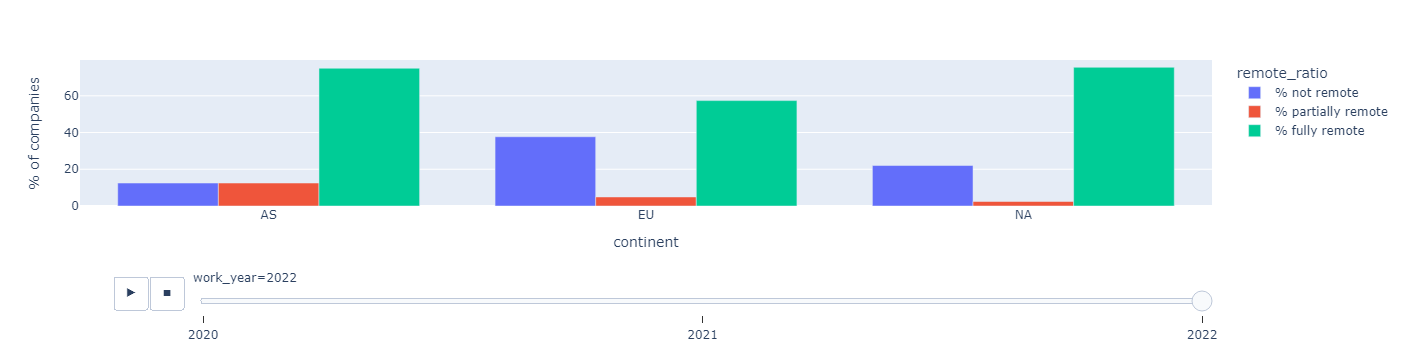

In [136]:
remote_fig = px.bar(remote_df_pivot, 
    x = 'continent', 
    y =  '% of companies',
    barmode = 'group',
    color= 'remote_ratio',
    animation_frame = 'work_year')
remote_fig.show()

### Common Data Job Titles

There are many different job titles related to data, but according to this word cloud Data Engineer, Data Scientist, Data Analyst, and Machine Learning are the most popular terms in job titles.

<a name="job_titles"></a>

In [138]:
#create a list of words from the job title column
titles = [x.split() for x in data['job_title']]
#flatten multiple lists into one list
lemmas = [item for sublist in titles for item in sublist]
#combine words in list into one string
string = (" ").join(lemmas)

In [139]:
#check if we only have one list of terms; i'll leave it as a comment as the output is quite long!
# string

'Data Scientist Machine Learning Scientist Big Data Engineer Product Data Analyst Machine Learning Engineer Data Analyst Lead Data Scientist Data Scientist Business Data Analyst Lead Data Engineer Data Scientist Data Scientist Data Scientist Lead Data Analyst Data Analyst Data Analyst Data Engineer Big Data Engineer Data Science Consultant Lead Data Engineer Machine Learning Engineer Product Data Analyst Data Engineer BI Data Analyst Lead Data Scientist Director of Data Science Research Scientist Data Engineer Business Data Analyst Machine Learning Manager Data Engineering Manager Big Data Engineer Data Scientist Research Scientist Data Analyst Data Engineer Data Science Consultant Machine Learning Engineer Data Analyst Machine Learning Engineer Data Scientist Data Engineering Manager Machine Learning Infrastructure Engineer Data Engineer Data Engineer ML Engineer Data Scientist Data Engineer Data Scientist Data Engineer Data Analyst Data Analyst AI Scientist Data Engineer Computer Vis

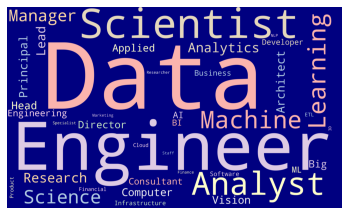

In [141]:
#create a word cloud
wc = WordCloud(width= 5000, height = 3000, 
               random_state=1, background_color='navy', 
               colormap='Pastel1', collocations=False, 
               stopwords = STOPWORDS).generate(string)

#Use matplotlib.pyplot to display the fitted wordcloud
#Turn axis off to get rid of axis numbers
plt.imshow(wc)
plt.axis('off')
plt.show()

### Average Salary for Common Data Jobs

Insights
1. It appears that data scientists have the highest salary on average.
2. Upon closert analysis, salaries for data scientists also vary more at 78K on average compared to the 53k standard deviation for analysts and 60k for data scientists.

<a name="salary_job_type"></a>

In [166]:
#Manually inspect the unique job titles present in the data set
data['job_title'].value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

In [167]:
# Create a copy of the data set
job_grouped = data

In [160]:
# I grouped the job titles into 3 main categories: data analysts, data scientists, and data engineers. 
# This grouping is just based on the word cloud above.
# I also excluded some titles which I felt did not fit the categories I made.
def cat_job(x):
    t = x.split()
    if t[-1] == 'Analyst':
        return 'Data Analyst'
    elif t[-1] == 'Scientist' or t[-1] == 'Researcher':
        return 'Data Scientist'
    elif t[-1] == 'Engineer' or t[-1] == 'Architect' or t[-1] == 'Developer':
        return 'Data Engineer'
    else:
        return 'Exclude'

In [168]:
# Use the function I defined to assign a job title to a category
job_grouped['job_type'] = job_grouped['job_title'].apply(cat_job)

In [169]:
# I removed the job titles that didn't belong to any categories.
job_grouped = job_grouped[job_grouped['job_type'] != 'Exclude']

In [170]:
# I calculated the mean salary in USD by job category.
job_mean = job_grouped.groupby(['job_type']).mean('salary').reset_index()

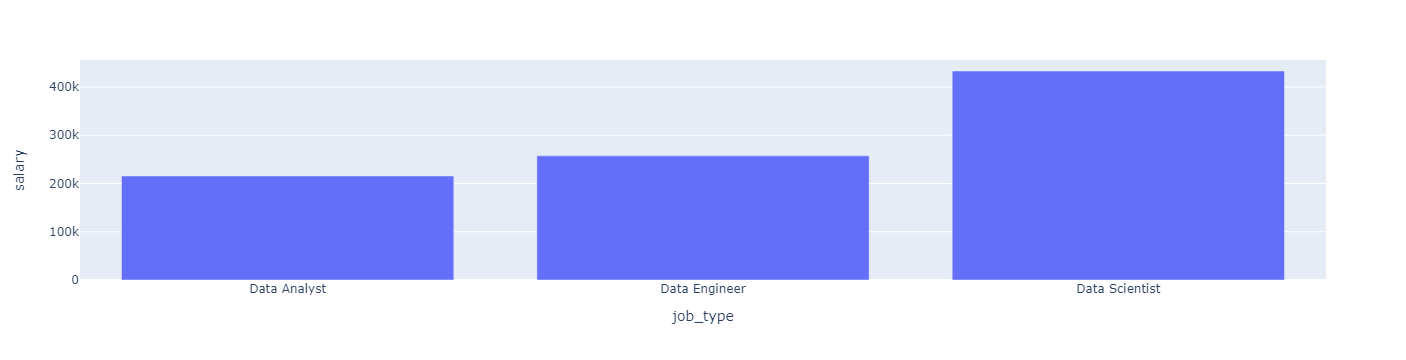

In [171]:
# Create the plot
job_fig = px.bar(job_mean, 
    x = 'job_type', 
    y =  'salary')
job_fig.show()

In [178]:
# I'm using the describe function to check the variance of the three categories. I made an analysis for each othe job categories I created.
job_grouped[job_grouped.job_type == 'Data Scientist'].describe()

,work_year,salary,salary_in_usd
count,195.000000,1.950000e+02,195.000000
mean,2021.328205,4.330628e+05,114639.215385
std,0.714341,2.335104e+06,77934.854760
min,2020.000000,4.000000e+03,2859.000000
25%,2021.000000,7.000000e+04,55628.000000
50%,2021.000000,1.201600e+05,104890.000000
75%,2022.000000,1.730000e+05,150000.000000
max,2022.000000,3.040000e+07,450000.000000


In [179]:
job_grouped[job_grouped.job_type == 'Data Analyst'].describe()

,work_year,salary,salary_in_usd
count,119.000000,1.190000e+02,119.000000
mean,2021.537815,2.155458e+05,93200.378151
std,0.686306,1.013879e+06,53383.595079
min,2020.000000,8.000000e+03,6072.000000
25%,2021.000000,6.165000e+04,60650.000000
50%,2022.000000,9.370000e+04,90320.000000
75%,2022.000000,1.276875e+05,116075.000000
max,2022.000000,1.100000e+07,450000.000000


In [181]:
job_grouped[job_grouped.job_type == 'Data Engineer'].describe()

,work_year,salary,salary_in_usd
count,240.000000,2.400000e+02,240.000000
mean,2021.454167,2.572514e+05,112477.195833
std,0.670651,8.418901e+05,69951.233606
min,2020.000000,4.000000e+03,4000.000000
25%,2021.000000,6.500000e+04,64725.000000
50%,2022.000000,1.125000e+05,100000.000000
75%,2022.000000,1.712500e+05,155000.000000
max,2022.000000,8.500000e+06,600000.000000


### Salary Increase with Experience

Insights
1. It appears that there is a sharp increase in salary at around mid level data careers.
2. Senior level careers earn lower on average in this data set.

In [183]:
# we can use this data frame since it has the experience leve column and salary column
job_grouped.head(3)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,continent,job_type
0,2020,Mid-level/Intermediate,FT,Data Scientist,70000,EUR,79833,DE,No remote or less than 20%,DE,L,EU,Data Scientist
1,2020,Senior-level/Expert,FT,Machine Learning Scientist,260000,USD,260000,JP,No remote or less than 20%,JP,S,AS,Data Scientist
2,2020,Senior-level/Expert,FT,Big Data Engineer,85000,GBP,109024,GB,Partially remote,GB,M,EU,Data Engineer


In [197]:
# we need to recode the experience level column so it's organized from least to most experience
exp_mapping = {'Entry-level/junior':'Entry level'
                    ,'Mid-level/Intermediate':'Mid level'
                    ,'Senior-level/Expert':'Senior level'
                    ,'Executive-level/Director':'Executive level'
                    }
job_grouped  = job_grouped.assign(experience_level = job_grouped.experience_level.map(exp_mapping))

<a name="salary_experience"></a>

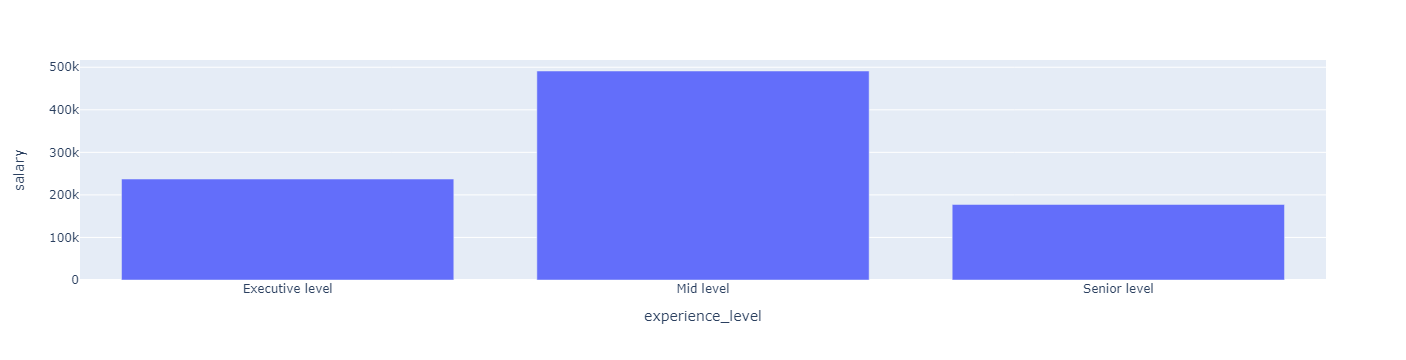

In [198]:
# Create the plot
exp_fig = px.bar(data_frame=job_grouped.groupby(['experience_level']).mean().reset_index(), 
    x = 'experience_level', 
    y =  'salary')
exp_fig.show()